# 03. 선 그래프 - 시간에 따라 달라지는 데이터 표현하기

선 그래프 line chart : 데이터를 선으로 표현한 그래프.
시간에 따라 달라지는 데이터를 표현할 때 자주 사용.
예를 들어 환율, 주가지수 등 경제지표가 시간에 따라 변하는 양상을 '선 그래프로'로 표현

시계열 데이터 time series data: 일별 환율처럼, 일정 시간 간격을 두고 나열된 데이터.
시계열 그래프 time series chart: 시계열 데이터를 선으로 표현한 그래프

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# 1. 시계열 그래프 만들기

In [2]:
# economics 데이터를 이용해 시계열 그래프를 만듬
# economics 는 미국의 여러 가지 경제 지표를 월별로 나타낸 데이터
# economics 를 이용해 시간에 따라 실업자 수가 어떻게 변하는지 나타낸 시계열 그래프를 만듬.

In [15]:
# economics 데이터 불러오기
economics = pd.read_csv('./input/economics.csv')
economics.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.0,12.6,4.5,2944
1,1967-08-01,509.8,198911.0,12.6,4.7,2945
2,1967-09-01,515.6,199113.0,11.9,4.6,2958
3,1967-10-01,512.2,199311.0,12.9,4.9,3143
4,1967-11-01,517.4,199498.0,12.8,4.7,3066


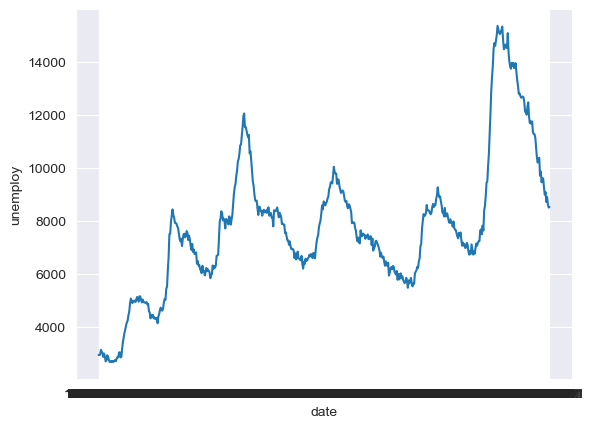

In [16]:
# sns.lineplot()을 이용하면 선 그래프를 만들 수 있음.
# x축에는 시간을 나타낸 date, y축에는 실업자 수를 나타낸 unemploy를 지정.
sns.lineplot(data=economics, x='date', y='unemploy')
plt.show()

In [6]:
# 출력된 그래프를 보면 x축에 굵은 선이 표시되어 있음.
# date 변수에는 '1967-07-01'처럼 '연월일'을 나타낸 문자가 있는데.
# 이 값이 x축에 가로로 여러 번 겹쳐 표시되어서 굵은 선으로 보임.

In [8]:
# 1) x축에 연도 표시하기
# x축에 연도가 표시되도록 설정.
# x축에 연도를 표시하려면 먼저 변수 타입을 날짜 시간 타입 datetime64 으로 바꿔야 함.
# economics 데이터의 date가 문자 object 타입으로 되어 있음.

In [17]:
# a) 날짜 시간 타입 변수 만들기
# 날짜 시간 타입 변수 만들기
# pd.to_datetime()을 이용하면 변수의 날짜 시간 타입으로 바꿀 수 있음
# date 타입을 날짜 시간 타입으로 변경해서 date2 변수 추가
economics['date2'] = pd.to_datetime(economics['date'])

In [18]:
# 변수 타입 확인
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 31.5+ KB


In [19]:
# date 열은 object 타입이고 datetime64 타입인 date2 열 추가 확인.

# 변수의 타입을 날짜 시간 타입으로 바꾸더라도 값이 달라지지 않음.
economics[['date', 'date2']].head()

,date,date2
0,1967-07-01,1967-07-01
1,1967-08-01,1967-08-01
2,1967-09-01,1967-09-01
3,1967-10-01,1967-10-01
4,1967-11-01,1967-11-01


In [20]:
# 출력 결과를 보면 두 변수의 값이 같음.

# date2 변수는 날짜 시간 타입으로 되어 있어서 df.dt를 이용해 연, 월, 일을 추출할 수 있음.

# 연 추출
economics['date2'].dt.year.head()

0    1967
1    1967
2    1967
3    1967
4    1967
Name: date2, dtype: int32

In [21]:
economics['date2'].dt.month.head()

0     7
1     8
2     9
3    10
4    11
Name: date2, dtype: int32

In [22]:
economics['date2'].dt.day.head()

0    1
1    1
2    1
3    1
4    1
Name: date2, dtype: int32

In [23]:
# b) 연도 변수 만들기
# economics에 년도를 나타낸 변수 year를 추가

# 연도 변수 추가
economics['year'] = economics['date2'].dt.year
economics.head()

,date,pce,pop,psavert,uempmed,unemploy,date2,year
0,1967-07-01,506.7,198712.0,12.6,4.5,2944,1967-07-01,1967
1,1967-08-01,509.8,198911.0,12.6,4.7,2945,1967-08-01,1967
2,1967-09-01,515.6,199113.0,11.9,4.6,2958,1967-09-01,1967
3,1967-10-01,512.2,199311.0,12.9,4.9,3143,1967-10-01,1967
4,1967-11-01,517.4,199498.0,12.8,4.7,3066,1967-11-01,1967


In [24]:
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
 7   year      574 non-null    int32         
dtypes: datetime64[ns](1), float64(4), int32(1), int64(1), object(1)
memory usage: 33.8+ KB


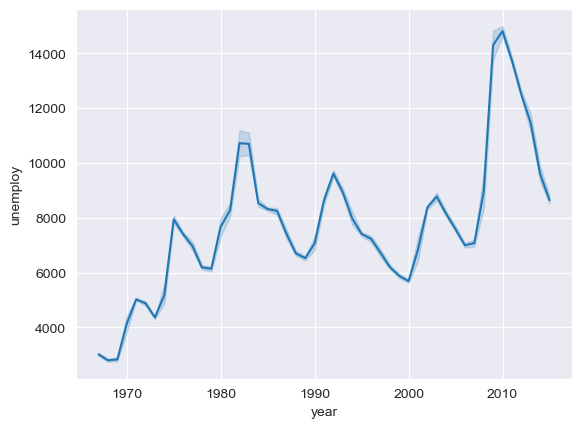

In [25]:
# c) x축에 연도 표시하기
# 연도를 나타낸 변수를 sns.lineplot() 의 x에 입력하면 x축에 연도가 표시

# x축에 연도 표시
sns.lineplot(data=economics, x='year', y='unemploy')
plt.show()

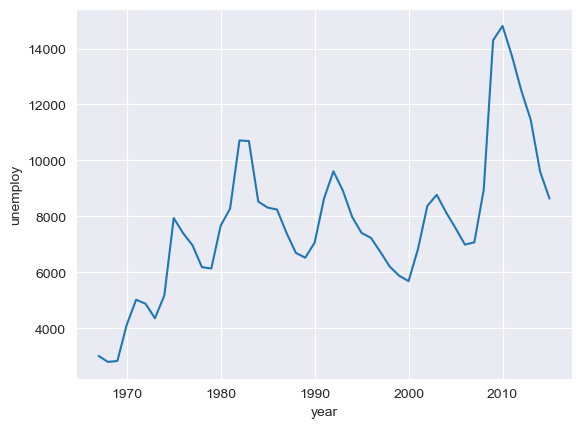

In [26]:
# 선의 위아래에 표시된 면적은 신뢰구간 confidence interval.
# 신뢰 구간을 표시하지 않을려면 errorbar=None를 입력하면 됨.

# 신뢰구간 제거
sns.lineplot(data=economics, x='year', y='unemploy', errorbar=None)
plt.show()

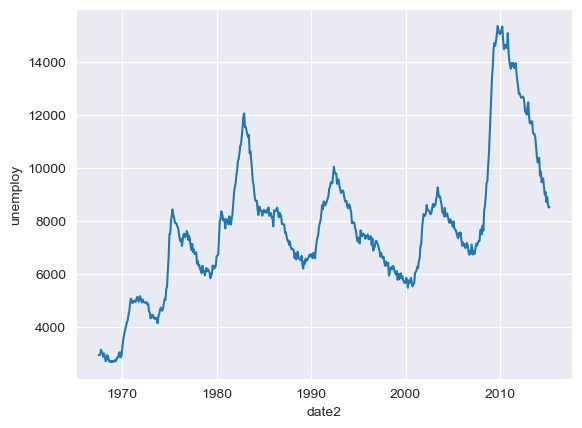

In [28]:
sns.lineplot(data=economics, x='date2', y='unemploy')
plt.show()